In this 3-part question, you will convert raw ACT scores to Z-scores and answer some questions about them.

Convert `act_scores` to Z-scores. Recall from Data Visualization (the second course in this series) that to standardize values (convert values into Z-scores, that is, values distributed with a mean of 0 and standard deviation of 1), you must subtract the mean and then divide by the standard deviation. Use the mean and standard deviation of `act_scores`, not the original values used to generate random test scores.

In [2]:
set.seed(16)
act_scores <- rnorm(10000, 20.9, 5.7)

In [3]:
avg <- mean(act_scores)
sd <- sd(act_scores)

In [6]:
z_scorify <- function(val){
    (val - avg)/sd
}

In [11]:
act_z_scores <- sapply(act_scores, z_scorify)

In [12]:
mean(act_z_scores > 2)

[1] 0.0233

In [13]:
#Answer
z_scores <- (act_scores - mean(act_scores))/sd(act_scores)
mean(z_scores > 2)

[1] 0.0233

## Question 3b
What ACT score value corresponds to 2 standard deviations above the mean (Z = 2)?

In [15]:
 2*sd(act_scores) + mean(act_scores)

[1] 32.1906

## Question 3c
A Z-score of 2 corresponds roughly to the 97.5th percentile.

Use `qnorm()` to determine the 97.5th percentile of normally distributed data with the mean and standard deviation observed in `act_scores`.

What is the 97.5th percentile of `act_scores`?

In [17]:
qnorm(.975, avg, sd)

[1] 31.96338

-------

In this 4-part question, you will write a function to create a CDF for ACT scores.

Write a function that takes a value and produces the probability of an ACT score less than or equal to that value (the CDF). Apply this function to the range 1 to 36.



In [19]:
act_cdf <- function(val) {
    mean(act_scores <= val)
}

In [24]:
cdf <- sapply(seq(1:36), act_cdf)

## Question 4a
What is the minimum integer score such that the probability of that score or lower is at least .95?

In [25]:
qnorm(.95, avg, sd)

[1] 30.17506

In [28]:
# Answer
min(which(cdf >= .95))# TODO: ???? What is the significance of this????

[1] 31

## Question 4b
Use qnorm() to determine the expected 95th percentile, the value for which the probability of receiving that score or lower is 0.95, given a mean score of 20.9 and standard deviation of 5.7.

What is the expected 95th percentile of ACT scores?

In [29]:
qnorm(.95, 20.9, 5.7)

[1] 30.27567

## Question 4c
As discussed in the Data Visualization course, we can use quantile() to determine sample quantiles from the data.

Make a vector containing the quantiles for p <- seq(0.01, 0.99, 0.01), the 1st through 99th percentiles of the act_scores data. Save these as sample_quantiles.

In what percentile is a score of 26?

In [30]:
p <- seq(0.01, 0.99, 0.01)

In [36]:
sample_quantiles <- quantile(act_scores, p)
sample_quantiles

1%        2%        3%        4%        5%        6%        7%        8% 
 7.605486  9.082775 10.144680 10.939440 11.484863 11.946022 12.433043 12.888911 
       9%       10%       11%       12%       13%       14%       15%       16% 
13.287754 13.604941 13.895066 14.198617 14.466640 14.713599 14.982739 15.249470 
      17%       18%       19%       20%       21%       22%       23%       24% 
15.478532 15.729987 15.941210 16.121997 16.320999 16.524470 16.675801 16.892451 
      25%       26%       27%       28%       29%       30%       31%       32% 
17.075199 17.243622 17.408227 17.601734 17.766148 17.927655 18.072476 18.229732 
      33%       34%       35%       36%       37%       38%       39%       40% 
18.349311 18.528077 18.675421 18.804975 18.946037 19.096910 19.253351 19.383482 
      41%       42%       43%       44%       45%       46%       47%       48% 
19.530808 19.664857 19.798331 19.948629 20.092783 20.243253 20.372475 20.512308 
      49%       50%       51%       52%       53%       54%       55%       56% 
20.660699 20.799459 20.927337 21.081092 21.234593 21.384291 21.538140 21.662325 
      57%       58%       59%       60%       61%       62%       63%       64% 
21.828803 21.997679 22.134444 22.276074 22.432175 22.563421 22.713592 22.854859 
      65%       66%       67%       68%       69%       70%       71%       72% 
23.004697 23.162456 23.328438 23.499639 23.664398 23.812226 23.984391 24.109988 
      73%       74%       75%       76%       77%       78%       79%       80% 
24.297049 24.481218 24.684994 24.890737 25.060321 25.235280 25.415344 25.600346 
      81%       82%       83%       84%       85%       86%       87%       88% 
25.808931 25.992660 26.210946 26.422927 26.696414 26.931452 27.237508 27.503935 
      89%       90%       91%       92%       93%       94%       95%       96% 
27.814940 28.102339 28.431910 28.866617 29.221679 29.608051 30.179905 30.683910 
      97%       98%       99% 
31.429286 32.561884 34.006562

In [45]:
names(sample_quantiles[max(which(sample_quantiles < 26))])

[1] "82%"

## Question 4d
Make a corresponding set of theoretical quantiles using `qnorm()` over the interval `p <- seq(0.01, 0.99, 0.01)` with mean 20.9 and standard deviation 5.7. Save these as `theoretical_quantiles`. Make a QQ-plot graphing `sample_quantiles` on the y-axis versus `theoretical_quantiles` on the x-axis.

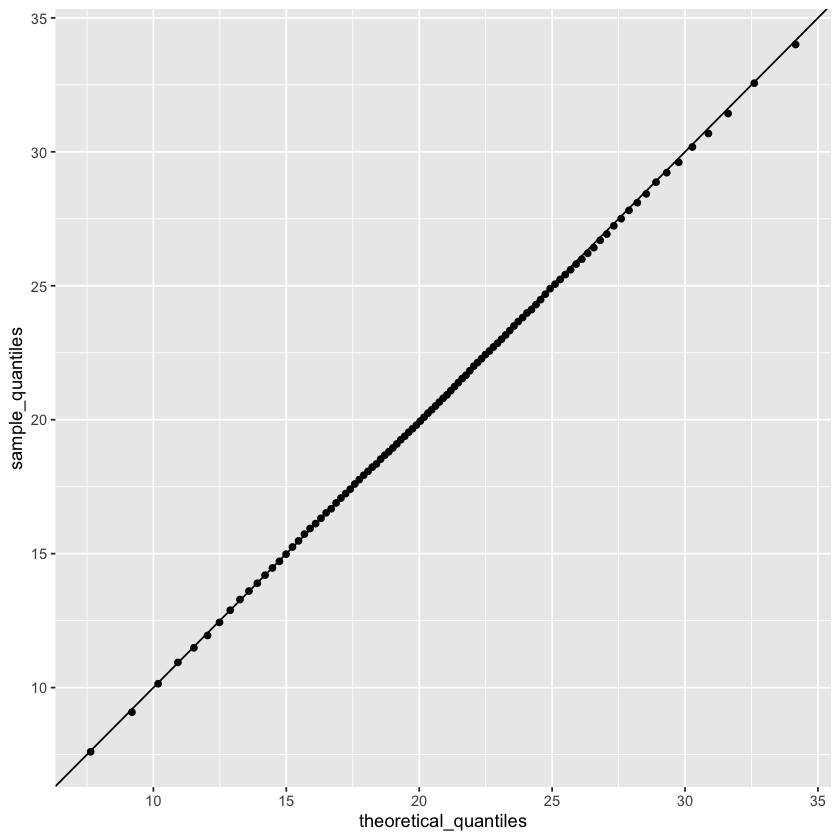

In [49]:
  p <- seq(0.01, 0.99, 0.01)
sample_quantiles <- quantile(act_scores, p)
theoretical_quantiles <- qnorm(p, 20.9, 5.7)
qplot(theoretical_quantiles, sample_quantiles) + geom_abline()